<a href="https://colab.research.google.com/github/zachary-fennie/Python-Scripting-for-SQL-Database/blob/main/main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fennie's Cloud Hosted Notebook Data Manipulation
## Python script reads a dataset, generates descriptive statistics, creates a visualization using Pandas, and performs some data manipulation

### FiveThirtyEight's MMS ICU Beds Dataset
This dataset combines data from the Centers for Disease Control and Prevention's Behavioral Risk Factor Surveillance System (BRFSS) and the Kaiser Family Foundation to illustrate the number of people who were at high risk for hospitalization from the novel coronavirus COVID-19 in 2020.\
URL: https://github.com/fivethirtyeight/data/blob/e6bbbb2d35310b5c63c2995a0d03d582d0c7b2e6/covid-geography/mmsa-icu-beds.csv


First, we will begin by reading in and examining a preview of our dataset. Previewing the data set ensures it was properly imported and stored.

In [2]:
# load required packages
import pandas as pd
import matplotlib.pyplot as plt

# create a local variable and import our data
data = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/covid-geography/mmsa-icu-beds.csv"
)

# preview a random sample of the data to test for a successful upload
data.sample(n=10)

,MMSA,total_percent_at_risk,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
38,"New York-Jersey City-White Plains, NY-NJ, Metr...",54.38%,2302.129085,75184.16695,2678.0,82.0,6165101.69
51,"Burlington-South Burlington, VT",54.84%,2104.114565,48394.63500,46.0,2.0,96789.27
37,"Deltona-Daytona Beach-Ormond Beach, FL",71.11%,2304.373554,63754.33500,166.0,6.0,382526.01
14,"Charlotte-Concord-Gastonia, NC-SC",60.63%,2919.072935,65192.62889,402.0,18.0,1173467.32
61,"Claremont-Lebanon, NH-VT",63.34%,2016.798750,12548.97000,56.0,9.0,112940.73
99,"Chicago-Naperville-Elgin, IL-IN-WI",56.02%,1548.761447,45614.71214,2474.0,84.0,3831635.82
42,"Virginia Beach-Norfolk-Newport News, VA-NC",60.85%,2228.447378,58894.68071,370.0,14.0,824525.53
100,"St. Louis, MO-IL",61.91%,1493.132605,38650.80400,906.0,35.0,1352778.14
50,"Camden, NJ, Metropolitan Division",63.56%,2109.945288,77804.23250,295.0,8.0,622433.86
82,"Port St. Lucie, FL",63.70%,1712.978951,81651.99667,143.0,3.0,244955.99


Great! However, it appears we do have fields marked as 'NaN'. 'NaN', an abbreaviation for 'Not a Number', is essentially a placeholder for a missing value. Luckily, the describe() Pandas method automatically filters out 'NaN' values.

In [3]:
# display summary statistics
data.describe()

,high_risk_per_ICU_bed,high_risk_per_hospital,icu_beds,hospitals,total_at_risk
count,135.000000,135.000000,135.000000,135.000000,1.360000e+02
mean,1947.356729,43787.067561,360.185185,13.762963,6.671887e+05
std,720.661896,17992.274197,450.580508,15.377929,8.847868e+05
min,413.667706,6770.190000,8.000000,1.000000,1.794153e+04
25%,1487.781317,31005.455625,89.500000,5.000000,1.587478e+05
50%,1923.676063,42460.360000,221.000000,9.000000,3.960815e+05
75%,2321.085003,56583.347585,489.500000,18.000000,9.327925e+05
max,4489.848750,91771.345830,2777.000000,100.000000,6.165102e+06


Excellent! The focus of this specific dataset was on comparing the population of high risk for hospitalization and the capacity that a county had to provide care with respect to the number of hospitals & ICU beds it had.

Let's continue by performing some data manipulation to see if we can find out more about the ground situation in 2020. First, we will graph a quick boxplot on the columns of most interest: 'High Risk per ICU Bed' and 'High Risk per Hospital'.

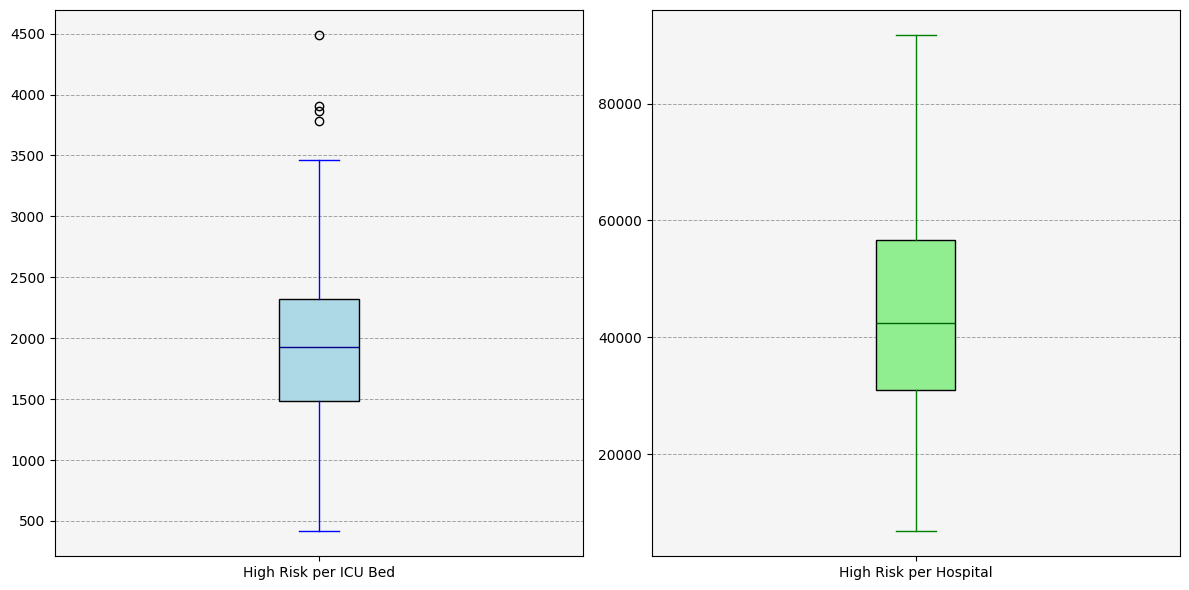

In [4]:
# slicing columns & dropping NaN values
plot_slice = data.iloc[:, 2].dropna()
plot_slice2 = data.iloc[:, 3].dropna()

# creating subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# box plot for the ICU
axes[0].boxplot(
    plot_slice.values,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue"),
    whiskerprops=dict(color="blue"),
    capprops=dict(color="blue"),
    medianprops=dict(color="darkblue"),
)
axes[0].set_xticklabels(["High Risk per ICU Bed"])

# box plot for the Hospital
axes[1].boxplot(
    plot_slice2.values,
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen"),
    whiskerprops=dict(color="green"),
    capprops=dict(color="green"),
    medianprops=dict(color="darkgreen"),
)
axes[1].set_xticklabels(["High Risk per Hospital"])

# custom grid
for ax in axes:
    ax.grid(axis="y", color="gray", linestyle="--", linewidth=0.7, alpha=0.7)
    ax.set_facecolor("whitesmoke")  # Set the background color

# adjust layout
plt.tight_layout()

# display plots
plt.show()

The boxplots illustrate the range of possiblities that hospitals would come to face during the pandemic. Tight boxplots would demonstrate a robust healthcare system capable of meeting the demands of the pandemic. However, as we can see here and as we witnessed in 2020, communities across the nation had different experiences of the infection as some had the ICU and hospital capcity to absorb the infection while others did not.

Since we can see the range of possible preparedness is great, lets try finding the least and most concerning cities/counties to better allocate resources.

In [12]:
top_10_lowest = data.nsmallest(10, 'high_risk_per_ICU_bed')
least_concerning_areas = top_10_lowest['MMSA']
print("Considering ICU beds, the least concerning areas are:")
for area in least_concerning_areas:
    print(area)

The least concerning areas are:
Rochester, MN
Gainesville, FL
Reno, NV
Duluth, MN-WI
Charleston, WV
Bismarck, ND
Fargo, ND-MN
Evansville, IN-KY
Scottsbluff, NE
Lexington-Fayette, KY


In [14]:
top_10_highest = data.nlargest(10, 'high_risk_per_ICU_bed')
most_concerning_areas = top_10_highest['MMSA']
print("Considering ICU beds, the most concerning areas are:")
for area in most_concerning_areas:
    print(area)

Considering ICU beds, the most concerning areas are:
Manhattan, KS
Hilton Head Island-Bluffton-Beaufort, SC
Kahului-Wailuku-Lahaina, HI
Spartanburg, SC
Baton Rouge, LA
Rockingham County-Strafford County, NH, Metropolitan Division
Salisbury, MD-DE
Wichita Falls, TX
Colorado Springs, CO
Cambridge-Newton-Framingham, MA, Metropolitan Division


Lets do one more check for the high risk per hospital so we can better differentiate trouble areas and resource allocation i.e. who specifically needs ICU beds & who needs full healthcare infrastructre.

In [16]:
top_10_hospital = data.nlargest(10, 'high_risk_per_hospital')
most_concerning_hospital = top_10_hospital['MMSA']
print("Considering hospitals, the most concerning areas are:")
for area in most_concerning_hospital:
    print(area)

Considering hospitals, the most concerning areas are:
Orlando-Kissimmee-Sanford, FL
Spartanburg, SC
Port St. Lucie, FL
Camden, NJ, Metropolitan Division
Colorado Springs, CO
New York-Jersey City-White Plains, NY-NJ, Metropolitan Division
Albuquerque, NM
Silver Spring-Frederick-Rockville, MD, Metropolitan Division
Wilmington, DE-MD-NJ, Metropolitan Division
Hagerstown-Martinsburg, MD-WV


In [21]:
emergency = top_10_highest[top_10_highest.isin(top_10_hospital)]
emergency = emergency.dropna()
emergency = emergency['MMSA']

print("The areas with bad ratios of both ICU beds and Hosptials are:")
for location in emergency:
    print(location)

The areas with bad ratios of ICU beds and Hosptials are:
Spartanburg, SC
Colorado Springs, CO


Thanks to the in-depth data manipulation we performed, we now know that both Spartanburg, SC and Colorado Springs, CO were areas of high concern and should have been first in-line for emergency resources. If we want, we can expand the code base in search of more high areas of concern so as to provide better emergency response.